In [1]:
import pandas as pd
housing_data = pd.read_csv ('London.csv')
housing_data.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [2]:
housing_data.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


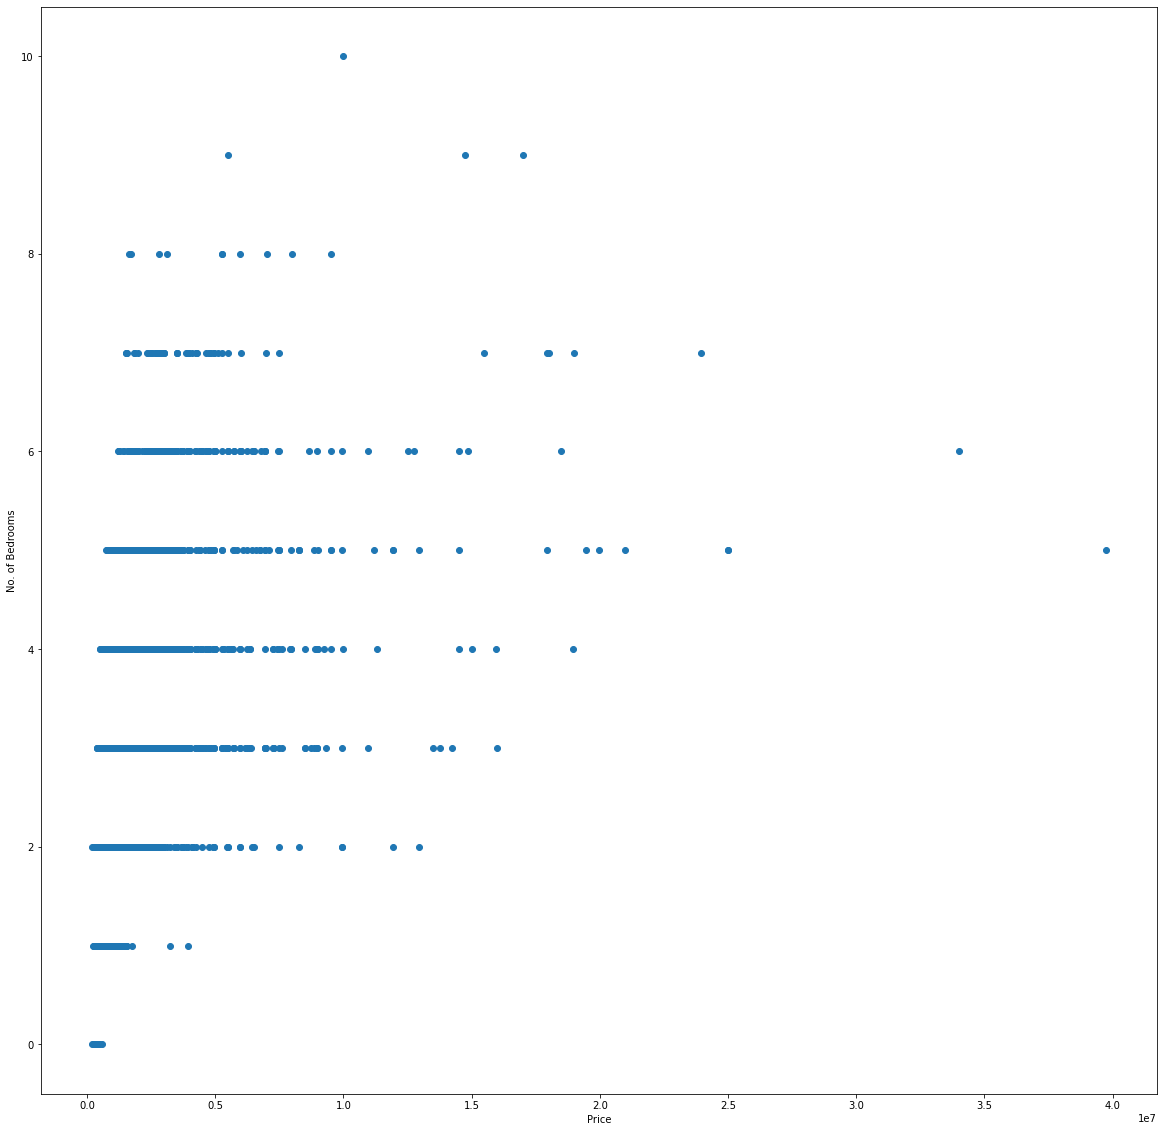

In [9]:
Price = housing_data['Price']
No_of_bedrooms = housing_data[['No. of Bedrooms']]
median_data = housing_data[['No. of Bedrooms', 'Price']]
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
plt.ylabel('No. of Bedrooms')
plt.xlabel('Price')
plt.scatter(Price, No_of_bedrooms)


In [6]:
import numpy as np
import statsmodels.api as sm

In [10]:
x_ary = housing_data['Price']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(housing_data['No. of Bedrooms'], x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

2.9154153902676375e-07
2.560251900877632


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        No. of Bedrooms   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     814.2
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.34e-161
Time:                        14:04:10   Log-Likelihood:                -6023.3
No. Observations:                3480   AIC:                         1.205e+04
Df Residuals:                    3478   BIC:                         1.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5603      0.030     85.376      0.0

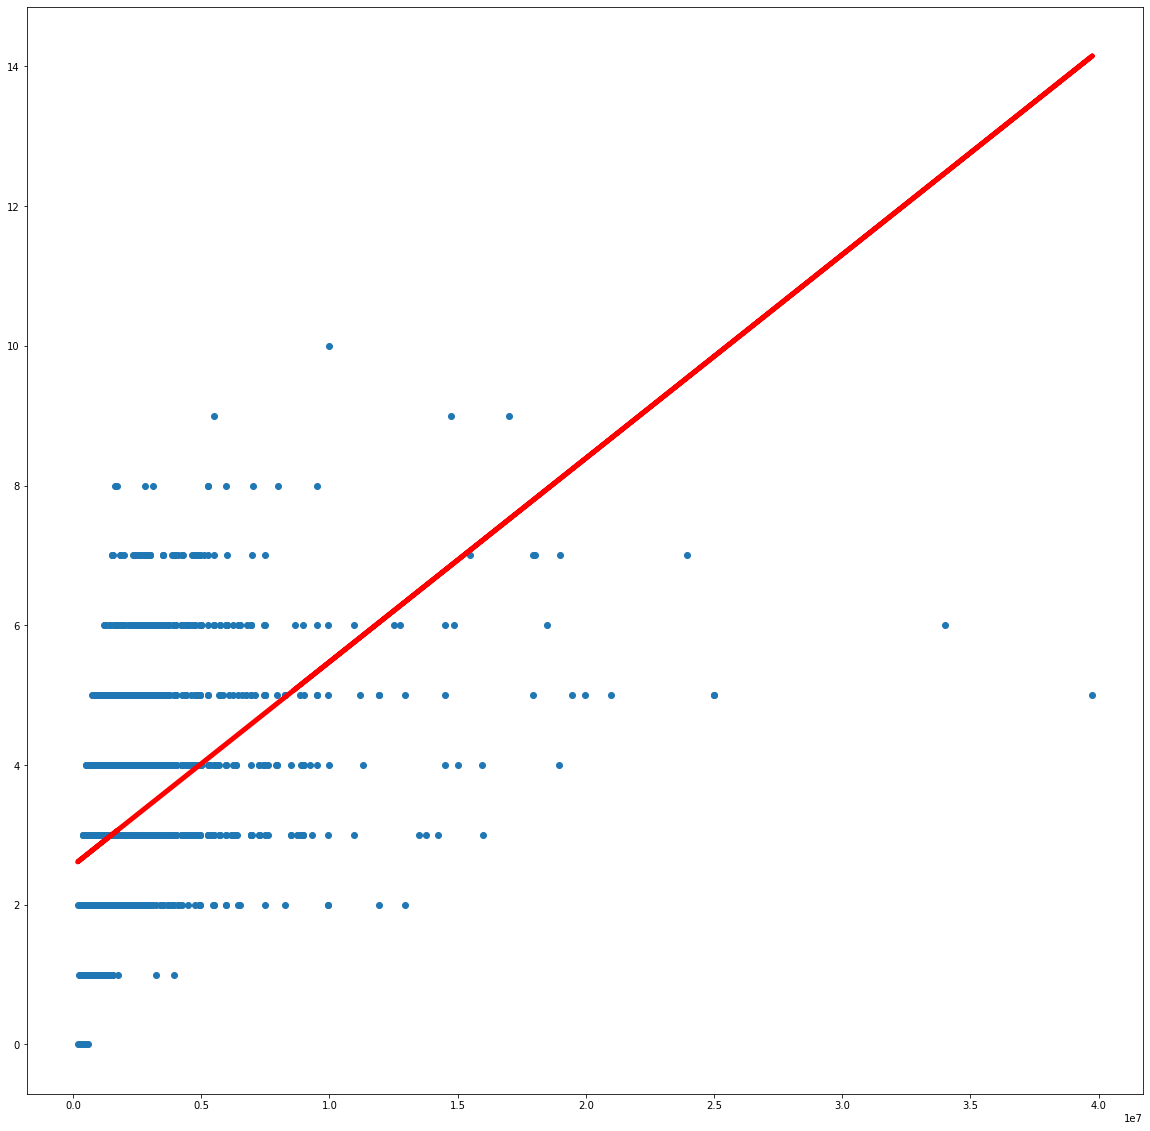

In [12]:
plt.figure(figsize = (20,20))
plt.scatter(housing_data['Price'],housing_data['No. of Bedrooms'])
plt.plot(x_ary, m*x_ary+b, color = 'red', linewidth = 5)